# Price Prediction for cars

Week two workbook for Machine Learning Zoomcamp

In [1]:
import pandas as pd
import numpy as np

## 2.2 Data Preparation

In [2]:
car_data = pd.read_csv('data/car_data/data.csv')

In [3]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


🔍 naming of columns inconsistant

In [4]:
car_data.columns = car_data.columns.str.lower().str.replace(' ','_')

In [5]:
car_data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

🔍 string values are also inconsistant when it comes to style  
🔍 we have columns with string values and columns with number columns

In [6]:
string_cols = list(car_data.dtypes[car_data.dtypes == 'object'].index) # here the object is a string
string_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for string_col in string_cols:
    car_data[string_col] = car_data[string_col].str.lower().str.replace(' ','_')

In [8]:
car_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Data exploration

In [9]:
for col in car_data.columns:
    print(col)
    print(f'number of unique values: {car_data[col].nunique()}')
    print(f'top five unique values: {car_data[col].unique()[:5]}')
    print()

make
number of unique values: 48
top five unique values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

model
number of unique values: 914
top five unique values: ['1_series_m' '1_series' '100' '124_spider' '190-class']

year
number of unique values: 28
top five unique values: [2011 2012 2013 1992 1993]

engine_fuel_type
number of unique values: 10
top five unique values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

engine_hp
number of unique values: 356
top five unique values: [335. 300. 230. 320. 172.]

engine_cylinders
number of unique values: 9
top five unique values: [ 6.  4.  5.  8. 12.]

transmission_type
number of unique values: 5
top five unique values: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

driven_wheels
number of unique values: 4
top five unique values: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

number_of_doors
number of unique val

🔍 There are `nan` values for the number of car doors (and potentially elsewhere)

### Distribution of price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

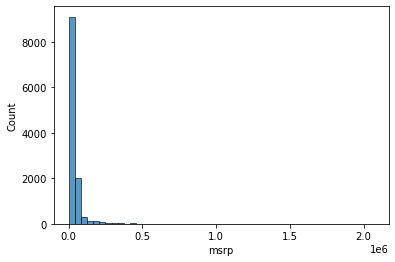

In [11]:
sns.histplot(car_data.msrp, bins=50)

1e6 == 10^6 ie 1 Million

🔍 very few cars are very expensive, the majority are at the lower end. We therefore have a long tail distribution for car price.

Let's zoom in by restricting the price range we look at

<AxesSubplot:xlabel='msrp', ylabel='Count'>

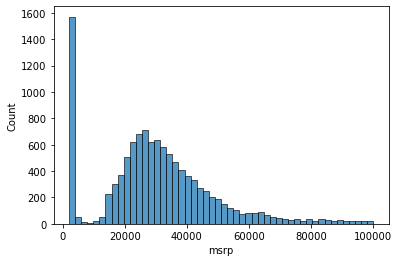

In [12]:
sns.histplot(car_data[car_data['msrp'] < 100000].msrp, bins=50)

In [13]:
# 1p adds one to all the values. We do this because logorithm of 0 doesn't exist.
np.log1p([0, 1, 10, 100, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052, 11.51293546])

❓ Not sure I fully understood why we add one here, though I can see that no values are at 0

In [14]:
price_logs = np.log1p(car_data.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

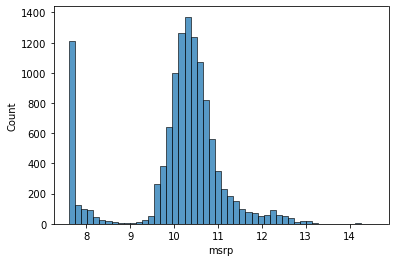

In [15]:
sns.histplot(price_logs, bins=50)

🔍 tail is now gone. The shape now also resembles the bell curve of normal distribution

In [16]:
car_data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

🔍 For `engine_fuel_type`, `engine_hp`, `engine_cyclinders`, `number_of_doors` or `market_category` there are `nan` values

## 2.4 Setting up the validation framework

In [17]:
# split data into test, train and validate sub sets
n = len(car_data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [18]:
assert n_val + n_test + n_train == n

In [19]:
np.random.seed(2) # ensures the notebook will be reproducible

# we have to shuffel first to try ensure that the three data sub sets are more representative
idx = np.arange(n)
np.random.shuffle(idx)

In [20]:
df_train = car_data.iloc[idx[:n_train]]
df_val = car_data.iloc[idx[n_train:n_train+n_val]]
df_test = car_data.iloc[idx[n_train+n_val:]]

In [21]:
# create x datasets
X_train = df_train.reset_index(drop=True)
X_val = df_val.reset_index(drop=True)
X_test = df_test.reset_index(drop=True)

In [22]:
# create y datasets from taking only the msrp values
y_train = np.log1p(X_train.msrp.values)
y_val = np.log1p(X_val.msrp.values)
y_test = np.log1p(X_test.msrp.values)

In [23]:
# remove the msrp values from the x datasets
del X_train['msrp']
del X_val['msrp']
del X_test['msrp']

In [24]:
X_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [25]:
y_train[:5]

array([ 9.57574708,  9.887663  ,  9.89323518,  7.60140233, 10.93775686])

## 2.5 Linear regression

one car and it's predicted price:  
g(xi) ≈ yi

xi = (xi1, xi2, .... xin)

g(xi) = w0 + w2xi1 + w3xi2 + ... wmXin

*where w is the weight for each feature, n the number of features and m the number of weights*

In [26]:
xi = X_train.iloc[10]

In [27]:
# for this example we will pick the following features
xi = xi[['engine_hp', 'city_mpg', 'popularity']]

In [28]:
# our weights, set by looking at what each feature denotes
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [29]:
def g(xi):
    '''
    takes a feature set and returns a prediction using linear regression
    '''
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [30]:
# we need to do exponent because before we ran log1p
predicted_price = np.expm1(g(xi))
print(f'predicted price (MSRP) is {predicted_price:.2f}')

predicted price (MSRP) is 222347.22


## 2.6 Linear Regression: Vector Form

We already looked at what the function g could look like for a single vector (specific car), now we want to make this more general so can use it on all our data.

In [31]:
# the inner part of previous function essentially was the dot product so we can go ahead and extract this out
def dot(xi, w):
    n = len(xi)
    
    result = 0.0
    
    for j in range(n):
        result += xi[j] * w[j]
    
    return result


def linear_regression(xi):
    return w0 + dot(xi, w)

If we add 1 to the start of `xi` and prepend `w0` to `w` we can then only run `xi.dot(w)`

<img src="data/imgs/linear_regression.png"
     alt="linear regression"
     width=400
     style="float: left"/>

In [32]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [33]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [34]:
def linear_regression_with_numpy(xi):
    return xi.dot(w_new)

In [35]:
linear_regression_with_numpy(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

How to create the weights ❓

`X * w = y`  

`w` is then the closest solution to this equation (this requires a substantial amount of math to actualy prove)  

`X.T * X` = Identity Matrix or close to it  

`w = X.T * y`  

`(X.T * X) * w == w`  

so we are left with:  

`w = (X.T * X).inverse * X.T * y`  

In code:
`w = XTX_inv.dot(X.T).dot(y)`

NOTE: sometimes we won't be able to get the inverse of a matrix

In [36]:

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [37]:
ones = np.ones(X.shape[0])

In [38]:
# add ones column to X matrix
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [39]:
# define our y for this example
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [40]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [41]:
XTX = X.T.dot(X)

In [42]:
XTX_inv = np.linalg.inv(XTX)

In [43]:
w_full = XTX_inv.dot(X.T).dot(y)

In [44]:
w0 = w_full[0]
w = w_full[1:]

In [45]:
w0, w

(25844.754055766833, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [46]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [47]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)

In [48]:
train_linear_regression(X, y)

(25844.754055766833, array([ -16.08906468, -199.47254894,   -1.22802883]))

🎉 we have our `w`s, next to try this on our car data!

## 2.8 Build Car price baseline model



In [49]:
# lets take only the numerical columns as features
features = ['engine_hp', 'city_mpg', 'popularity', 'engine_cylinders', 'highway_mpg']

In [50]:
X_train = df_train[features].fillna(0).values
# fill none values with zero which means we will get Xi * wi which means this feature will be ignored
# this might not always make sense practically, ie we wouldn't have zero cylinders in a car
# alternatives might be filling it with a min or mean value
# .values gets us the numpy array

In [51]:
w0, w = train_linear_regression(X_train, y_train)

In [52]:
w0, w

(7.92725738807008,
 array([ 9.70589522e-03,  1.49441072e-02, -9.06908672e-06, -1.59103494e-01,
         1.43792133e-02]))

Now we can use these weights to predict prices!

In [53]:
y_pred = w0 + X_train.dot(w)

Let's plot the predictions against the true value

<AxesSubplot:ylabel='Count'>

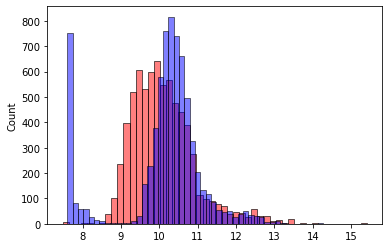

In [54]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

We see that the predictions (red) are not completely matching the actually prices (blue), in general it predicts a lower price.

## 2.9 RMSE (Root Square Mean Error)

### Evaluating regression models

`RMSE = AVG(g(Xi) - yi)^2)`

where `y` is the actual value and `g(xi)` is the prediction for `xi`

- we look at the difference between the prediction and the actual value to get the error value
- we square this error value
- we take the average value for this square error
- we take the square root of this to get the Root square mean error

In [55]:
def rmse(y, y_pred):
    err = y - y_pred
    se = err ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [56]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10 Validating the model

We are now ready to test our model on our validation data and evaulate the model.

First we need a way to prepare the data for training regardless of if it is the train, test or validation data set.


In [57]:
features = ['engine_hp', 'city_mpg', 'popularity', 'engine_cylinders', 'highway_mpg']

def prepare_X(df):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X  

In [58]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301592

## 2.11 Simple feature engineering

Let's look at some of the features (columns) we didn't use yet. Probably most important here would be the year. This we know practically has an impact on the price of a car. We should look at the age in relation to the year the data was collected. 

In [59]:
base_features = ['engine_hp', 'city_mpg', 'popularity', 'engine_cylinders', 'highway_mpg']
year_data_collected = 2017

def prepare_X(df):
    # we don't want to modify the original dataframe!!
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base_features + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X  

In [60]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058302

We see here our model has improved in accuracy from 0.71 to 0.51

<AxesSubplot:ylabel='Count'>

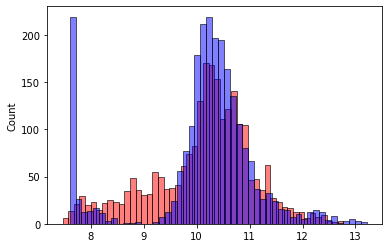

In [61]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

🎉 Our curve is now closer! Though there are still some misses.

## 2.12 Categorical variables

Car doors looks numerical however it is categorical because we have different types of cars, 2 door, 3 door, 4 door etc We can encode such values by having a column per category and putting either a 1 (to indicate it is of that category) or a 0. This is called one hot encoding.

In [62]:
(df_train.number_of_doors == 4).astype('int') # this returns a boolean so putting it to type int makes it numerical (0 or 1)

2735     0
6720     1
5878     1
11190    0
4554     1
        ..
434      0
1902     0
9334     1
5284     1
2420     1
Name: number_of_doors, Length: 7150, dtype: int64

In [63]:
df_train.number_of_doors.dropna().unique()

array([2., 4., 3.])

In [64]:
for v in df_train.number_of_doors.dropna().unique():
    df_train['num_of_doors_%s' % v] = (df_train.number_of_doors == v).astype('int') 

/tmp/ipykernel_328/2081740666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_of_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')


Let's add this to our data preparation

In [65]:
base_features = ['engine_hp', 'city_mpg', 'popularity', 'engine_cylinders', 'highway_mpg']
year_data_collected = 2017

def prepare_X(df):
    # we don't want to modify the original dataframe!!
    df = df.copy()
    features = base_features.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in df.number_of_doors.dropna().unique(): # exclude any nan values
        feature_name = 'num_of_doors_%s' % v
        df[feature_name] = (df.number_of_doors == v).astype('int')
        features.append(feature_name)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X  


In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5174578807554217

This is pretty much the same as what we had before (0.5172055461058302) suggesting that the number of car doors as a feature doesn't have much impact on our predictions. What about Make?

In [67]:
list(df_train.make.value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [68]:
# Lets take all other categorical columns and create a dictionary with their top 5 values
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)
    
categorical

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

We can now add this to our data preparation as we did with the no. of car doors

In [69]:
base_features = ['engine_hp', 'city_mpg', 'popularity', 'engine_cylinders', 'highway_mpg']
year_data_collected = 2017

def prepare_X(df):
    # we don't want to modify the original dataframe!!
    df = df.copy()
    features = base_features.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in df.number_of_doors.dropna().unique(): # exclude any nan values
        feature_name = 'num_of_doors_%s' % v
        df[feature_name] = (df.number_of_doors == v).astype('int')
        features.append(feature_name)
    
    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X  


In [70]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

36.01183813716153

🤔 What has happened we now have a vastly higher RMSE!Our model is now much worse than before.

## 2.13 Regularisation

In [71]:
w0, w

(-1653768488658528.5,
 array([-2.17620836e-01, -3.17528119e+00,  1.87991396e-04, -2.95435186e+00,
        -1.67217385e+00, -2.29527593e+00, -1.02747245e+03, -1.03750678e+03,
        -1.06138227e+03, -4.27034583e+00, -5.54270950e+00, -6.91484749e+00,
         3.27039352e+01, -3.35543763e+00, -5.36399139e+00, -4.54479510e+01,
         7.77179361e-01, -1.13821598e+01, -2.12636107e+02, -2.49864166e+02,
        -2.34052257e+02, -2.48469933e+02, -2.47455678e+02, -2.49667915e+02,
         1.65376849e+15,  1.65376849e+15,  1.65376849e+15,  1.65376849e+15,
        -3.66004221e+00, -6.08046827e-01, -3.19458927e+00, -4.80580855e+00,
        -3.97715041e+00, -8.70323183e+00, -5.12511738e+00, -8.81732390e+00,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

We see that `w0` is a huge negative number! This can happen when we have duplicate columns.

In [72]:
# note that column 2 and 3 are the same!
A = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5]
]
A = np.array(A)

In [73]:
A.T.dot(A)
# note that again column 2 and 3 are the same!

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

The inverse will therefore not exist because one column is a linear combination of other columns, which means it's possible to express column number 3 with other columns from the matrix (in this case column number 2) ie it's a duplicate. We will therefore get an error (`LinAlgError: Singular matrix`) when we try get the inverse with `np.linalg.inv(ATA)`.

A way round this is to add a tiny bit of noise to our data to avoid matrices being singular (containing duplicates and therefore not possible to invert). This is normally done by adding a small value to each value on the diagonal.

In [74]:
ATA = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
]
ATA = np.array(ATA)
np.linalg.inv(ATA)

LinAlgError: Singular matrix

In [75]:
ATA = [
    [4.001,4,4],
    [3,5.001,5],
    [5,1,1.001],
]
ATA = np.array(ATA)
np.linalg.inv(ATA)

array([[-7.51063924e-01,  5.00625845e-01,  5.00625845e-01],
       [-2.75306668e+03,  2.00187747e+03,  1.00187747e+03],
       [ 2.75406793e+03, -2.00237822e+03, -1.00237822e+03]])

Worth noting is that if we do this not on the diagonal we will see large values for some of the columns (features) which will give us problems with the model.

In [76]:
ATA = ATA + 0.01 * np.eye(3) # 3 here is the width of the matrix
ATA

array([[4.011, 4.   , 4.   ],
       [3.   , 5.011, 5.   ],
       [5.   , 1.   , 1.011]])

In [77]:
np.linalg.inv(ATA)

array([[  -0.76186213,    0.50697862,    0.50697862],
       [-253.1090781 ,  183.72074585,   92.81165494],
       [ 254.12303535, -184.22911867,  -93.32002776]])

The larger the number on the diagonal the smaller the values of the inverse . This regularisation can be something we want to tune (ie it's a parameter for our model)

Let's add this to our linear regression function.

In [146]:
def train_linear_regression_regularised(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


def prepare_X(df):
    df = df.copy()
    features = base_features.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    no_of_door_cats = list(df.number_of_doors.dropna().astype(int).unique())
    no_of_door_cats = [2,4,3] # WHY is this different from the above??

    for v in no_of_door_cats :
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [147]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_regularised(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.46081585828284216

### 🤔 Why does `list(df_train.number_of_doors.dropna().astype(int).unique())` and `[2,3,4]` differ and affect the model ⁉️

In [99]:
list(df_train.number_of_doors.dropna().astype(int).unique())

[2, 4, 3]

For some reason my model returns a lower value for `rmse` (0.46081585828284216) when I hard code the list of no. of car door categories over dynamically building the list from the unique values in the column (0.5392811963534826).

In [148]:
def prepare_X_dynamic(df):
    df = df.copy()
    features = base_features.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    no_of_door_cats = list(df.number_of_doors.dropna().astype(int).unique())

    for v in no_of_door_cats :
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [142]:
X_train_with_hardcode_list = prepare_X(df_train)
w0, w = train_linear_regression_regularised(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.46081585828284216

In [151]:
X_train_with_dynamic_list = prepare_X_dynamic(df_train)
w0, w = train_linear_regression_regularised(X_train_with_dynamic_list, y_train)

X_val = prepare_X_dynamic(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5392811963534826

In [154]:
# Both appear to produce the same dataframe
assert X_train_with_hardcode_list.all() == X_train_with_dynamic_list.all()

Perhaps they have different types?

In [111]:
type(list(df_train.number_of_doors.dropna().astype(int).unique()))

list

In [112]:
type([2, 3, 4])

list

Perhaps order matters?

I tested with `[2,4,3]` and it still returned the lower output

## 2.14 Tuning the model

We now want to find the best value for our `r` parameter

In [159]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_regularised(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(f' regularisation: {r}, bias term: {w0}, score: {score}')

 regularisation: 0.0, bias term: -1653768488658528.5, score: 34.36916821356011
 regularisation: 1e-05, bias term: 6.464253295739703, score: 0.46081532379004586
 regularisation: 0.0001, bias term: 7.130479885098391, score: 0.4608153639547774
 regularisation: 0.001, bias term: 7.130969849094399, score: 0.46081585828284216
 regularisation: 0.1, bias term: 7.000232412373935, score: 0.46087365491271426
 regularisation: 1, bias term: 6.250747847291343, score: 0.4615812838275672
 regularisation: 10, bias term: 4.729512585680183, score: 0.47260987726680176


In [162]:
# we picked this from the values above where we see our score is the best and the model has not degraded
# in our example it did not matter so much
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_regularised(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46081585828284216

❓ How to see if when the model is degrading due to regularisation?

## 2.15 Using the model

Now we want to use our model on our test data set. We will train the model first on both the train and validation set (full train) and make the final check on the test data set. Our RSME should be similar to what we saw previously.

In [168]:
full_train = pd.concat([df_train, df_val])
full_train = full_train.reset_index(drop=True) # we reset the index here as we still have the index from the validation data
full_y = np.concatenate([y_train, y_val])

❓ Why is it important here to reset the index??

In [173]:
r = 0.001
X_train = prepare_X(full_train)
w0, w = train_linear_regression_regularised(X_train, full_y, r=r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.46007539688852456

In [193]:
car = df_test.iloc[20].to_dict() # we take one value from our test data, in real life this would have been entered by a user
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'msrp': 35000}

In [194]:
df_small = pd.DataFrame([car])
df_small
# we now have a dataframe with only one row of our INPUT data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031,35000


In [195]:
X_small = prepare_X(df_small)

In [196]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.632492524438463

In [197]:
# to get this to the price value we need the exponant
np.expm1(y_pred)

41459.33742145584

In [198]:
np.expm1(y_test[20])

35000.00000000001

There are quite close, our prediction was off by about 5000.